In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:

df_choice1 = pd.read_csv('data\choice_95.csv')
df_choice2 = pd.read_csv('data\choice_100.csv')
df_choice3 = pd.read_csv('data\choice_150.csv')

df_win1 = pd.read_csv('data\wi_95.csv')
df_win2 = pd.read_csv('data\wi_100.csv')
df_win3 = pd.read_csv('data\wi_150.csv')

df_lose1 = pd.read_csv('data\lo_95.csv')
df_lose2 = pd.read_csv('data\lo_100.csv')
df_lose3 = pd.read_csv('data\lo_150.csv')


In [3]:
df_choice1.shape #15 observations
df_choice2.shape #508 observations
df_choice3.shape #98 observations

(98, 150)

In [4]:
df_choice2.head()

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95,Choice_96,Choice_97,Choice_98,Choice_99,Choice_100
Subj_1,1,1,2,4,3,2,1,2,4,2,...,1,1,1,2,2,2,4,2,4,2
Subj_2,2,1,4,4,3,2,3,2,1,2,...,4,2,3,4,2,4,4,2,2,4
Subj_3,4,2,3,1,4,2,4,4,4,3,...,3,2,1,4,2,2,2,4,2,2
Subj_4,4,3,4,2,1,4,3,2,2,2,...,4,2,3,4,3,4,1,4,3,4
Subj_5,1,2,2,2,2,3,4,1,4,1,...,2,2,2,2,3,3,3,3,4,4


In [5]:
df_choice3 = df_choice3.drop(df_choice3.columns[100:150], axis=1)
df_win3 = df_win3.drop(df_win3.columns[100:150], axis=1)
df_lose3 = df_lose3.drop(df_lose3.columns[100:150], axis=1)

#now we can combine the two datasets together (100 trials and 150 trials)
df_choice = pd.concat([df_choice2, df_choice3], axis=0, ignore_index=True)
df_win = pd.concat([df_win2, df_win3], axis=0, ignore_index=True)
df_lose = pd.concat([df_lose2, df_lose3], axis=0, ignore_index=True)

In [6]:
df_choice.shape #606 observations
df_choice.head()

,Choice_1,Choice_2,Choice_3,Choice_4,Choice_5,Choice_6,Choice_7,Choice_8,Choice_9,Choice_10,...,Choice_91,Choice_92,Choice_93,Choice_94,Choice_95,Choice_96,Choice_97,Choice_98,Choice_99,Choice_100
0,1,1,2,4,3,2,1,2,4,2,...,1,1,1,2,2,2,4,2,4,2
1,2,1,4,4,3,2,3,2,1,2,...,4,2,3,4,2,4,4,2,2,4
2,4,2,3,1,4,2,4,4,4,3,...,3,2,1,4,2,2,2,4,2,2
3,4,3,4,2,1,4,3,2,2,2,...,4,2,3,4,3,4,1,4,3,4
4,1,2,2,2,2,3,4,1,4,1,...,2,2,2,2,3,3,3,3,4,4


### Choices

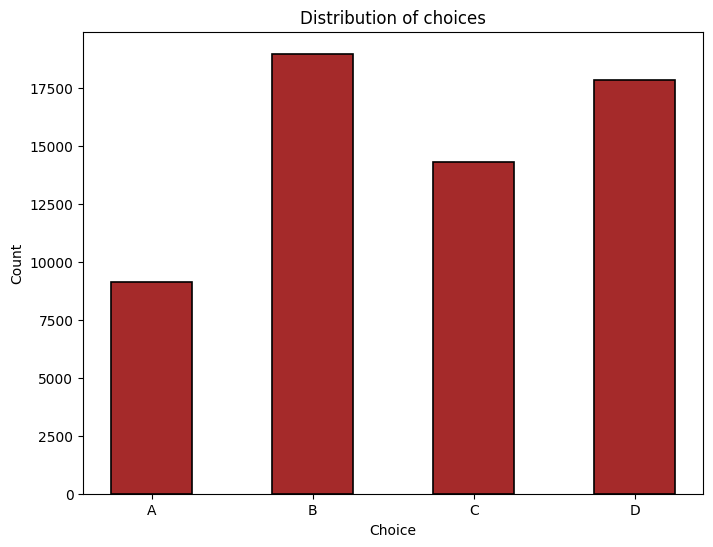

In [7]:
#distribution of choices
choices = df_choice.values.flatten()
choices_count  = np.bincount(choices.astype(int))
cards = ['A', 'B', 'C', 'D']

plt.figure(figsize=(8, 6))
plt.bar(cards, choices_count[1:5], color='brown', width= 0.5, edgecolor='black', linewidth=1.2, )
plt.title('Distribution of choices')
plt.xlabel('Choice')
plt.ylabel('Count')
plt.show()




there are two decks with frequent losses (decks A and C), and two decks with infrequent losses (decks B and D).

In [8]:
#dropping row 549 because it has 0 values
df_choice = df_choice.drop([549, 600])
df_choice.shape

(600, 100)

In [9]:
#creating an empty dataframe to store the count data for each deck (A, B, C, D)
count = np.zeros((df_choice.shape[0], 4))
df_choice.drop(df_choice.iloc[549], axis=0)

#creating a for loop to count the number of times each deck was chosen
for i in range(df_choice.shape[0]):
    count[i] = df_choice.iloc[i].value_counts().sort_index()

count[0] = df_choice.iloc[0].value_counts().sort_index()

df_count = pd.DataFrame(count, columns=['A', 'B', 'C', 'D'])
df_count.head()


,A,B,C,D
0,21.0,42.0,15.0,22.0
1,14.0,35.0,18.0,33.0
2,21.0,42.0,7.0,30.0
3,13.0,24.0,28.0,35.0
4,15.0,31.0,28.0,26.0


In [32]:
df_count.describe()

,A,B,C,D
count,600.000000,600.000000,600.000000,600.000000
mean,15.506667,31.908333,23.748333,29.836667
std,8.755439,15.164317,16.506234,15.245569
min,1.000000,1.000000,1.000000,1.000000
25%,10.000000,22.000000,13.000000,20.000000
50%,15.000000,30.000000,20.000000,28.000000
75%,20.000000,40.000000,28.000000,37.000000
max,100.000000,100.000000,100.000000,100.000000


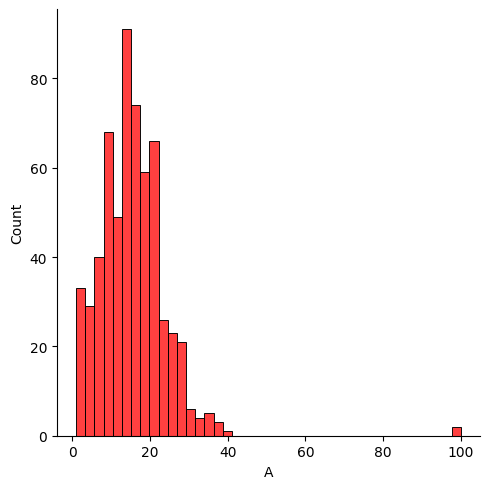

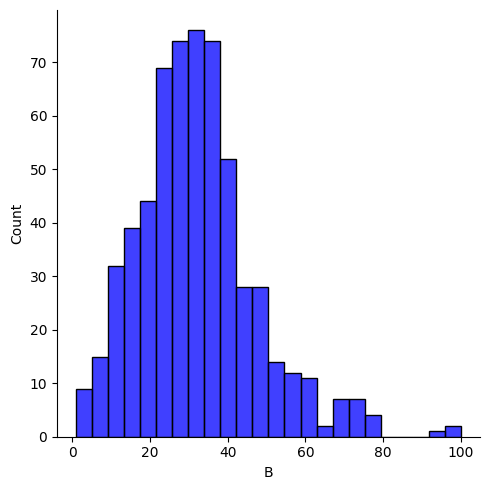

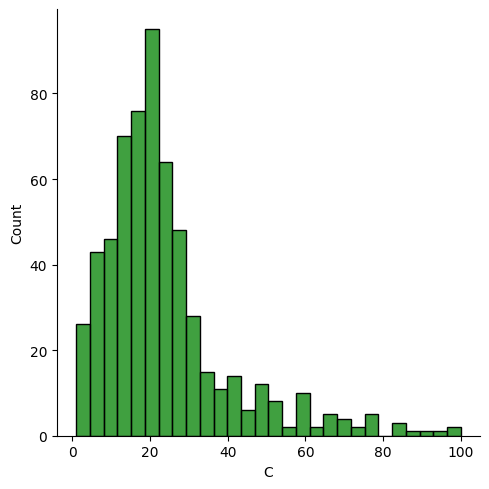

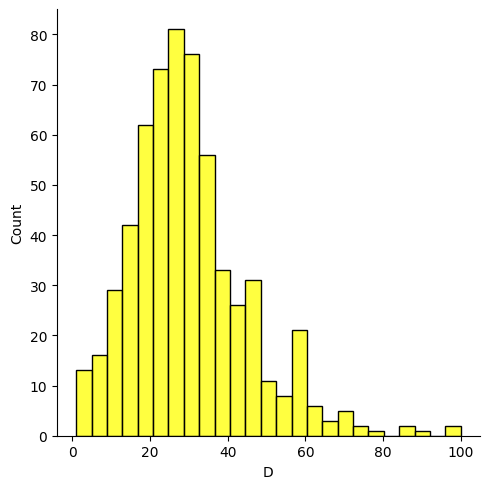

In [10]:
#creating a distribution plot for the count of each deck

sns.displot(df_count['A'], color='red', label='A')
sns.displot(df_count['B'], color='blue', label='B')
sns.displot(df_count['C'], color='green', label='C')
sns.displot(df_count['D'], color='yellow', label='D')


plt.show()


### Wins

In [11]:
df_win.head()

,Wins_1,Wins_2,Wins_3,Wins_4,Wins_5,Wins_6,Wins_7,Wins_8,Wins_9,Wins_10,...,Wins_91,Wins_92,Wins_93,Wins_94,Wins_95,Wins_96,Wins_97,Wins_98,Wins_99,Wins_100
0,100,100,100,50,50,100,100,100,50,100,...,100,100,100,100,100,100,50,100,50,100
1,100,100,50,50,50,100,50,100,100,100,...,50,100,50,50,100,50,50,100,100,50
2,50,100,50,100,50,100,50,50,50,50,...,50,100,100,50,100,100,100,50,100,100
3,50,50,50,100,100,50,50,100,100,100,...,50,100,50,50,50,50,100,50,50,50
4,100,100,100,100,100,50,50,100,50,100,...,100,100,100,100,50,50,50,50,50,50


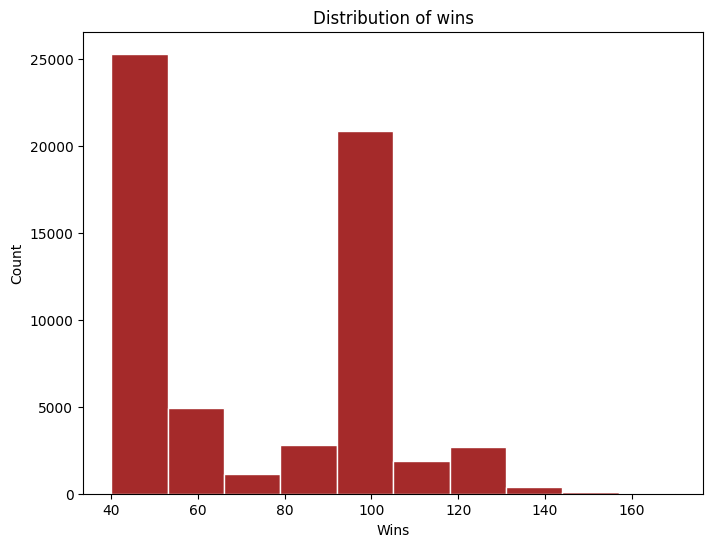

In [17]:
# distribution of wins
wins = df_win.values.flatten()

plt.figure(figsize=(8, 6))
plt.hist(wins, color='brown', edgecolor='white', bins = 10)
plt.title('Distribution of wins')
plt.xlabel('Wins')
plt.ylabel('Count')
plt.show()


In [18]:
df_lose.head()

,Losses_1,Losses_2,Losses_3,Losses_4,Losses_5,Losses_6,Losses_7,Losses_8,Losses_9,Losses_10,...,Losses_91,Losses_92,Losses_93,Losses_94,Losses_95,Losses_96,Losses_97,Losses_98,Losses_99,Losses_100
0,-200,-150,0,-250,0,0,0,0,0,0,...,0,0,-350,0,0,0,0,0,0,-1250
1,0,0,0,0,0,0,-50,0,0,0,...,0,0,0,-250,-1250,0,0,0,0,0
2,0,0,-50,-300,0,-1250,0,0,0,-50,...,-50,0,-200,0,0,0,0,0,0,0
3,-250,-50,0,0,-200,0,0,0,0,-1250,...,0,0,0,0,-50,0,0,0,-50,0
4,0,0,0,-1250,0,-50,0,0,0,0,...,0,0,0,-1250,0,0,0,-50,0,0


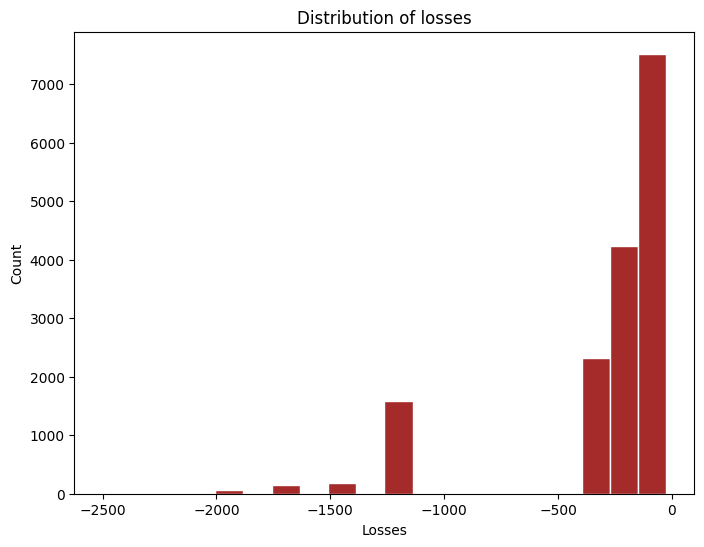

array([ -200,  -150,  -250, ...,  -250,   -50, -1250], dtype=int64)

In [25]:
# distribution of losses

losses = df_lose.values.flatten()
#remove 0 values
losses = losses[losses != 0]

plt.figure(figsize=(8, 6))
plt.hist(losses, color='brown', edgecolor='white', bins = 20)
plt.title('Distribution of losses')
plt.xlabel('Losses')
plt.ylabel('Count')
plt.show()

losses